In [2]:
import pandas as pd 
from matplotlib import pyplot as plt

df = pd.read_csv('ad_spend.csv')
df.head(3)

,Ad Spend ($),Season,Revenue ($)
0,463,Monsoon,440
1,158,Winter,297
2,328,Monsoon,214


In [3]:
df.shape

(200, 3)

In [6]:
g = df.groupby('Season')[['Ad Spend ($)','Revenue ($)']].mean()
g

,Ad Spend ($),Revenue ($)
Season,,
Monsoon,517.643836,423.150685
Summer,573.836066,689.360656
Winter,552.560606,826.530303


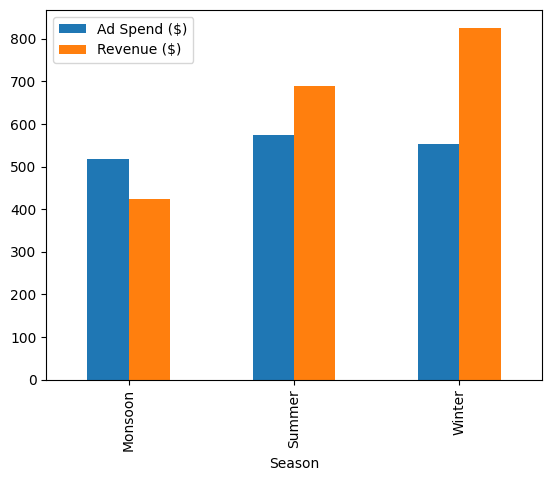

In [8]:
ax = g.plot(kind = 'bar')
plt.show()

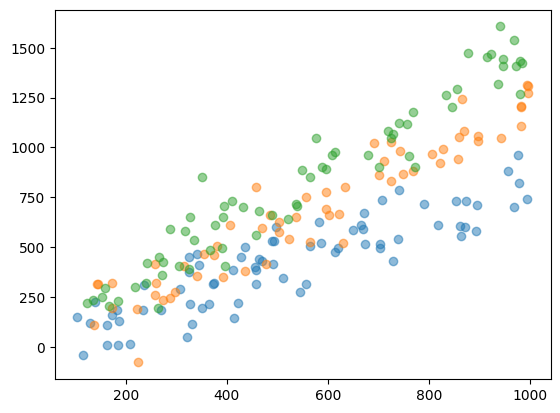

In [10]:
for season , subdf in df.groupby('Season'):
    plt.scatter(subdf['Ad Spend ($)'], subdf['Revenue ($)'], label = season , alpha=0.5)
plt.show()

In [12]:
df_encoded = pd.get_dummies(df, columns=["Season"], drop_first=True)
df_encoded

,Ad Spend ($),Revenue ($),Season_Summer,Season_Winter
0,463,440,False,False
1,158,297,False,True
2,328,214,False,False
3,322,48,False,False
4,726,1048,False,True
...,...,...,...,...
195,407,609,True,False
196,182,183,False,False
197,184,10,False,False
198,380,504,True,False


In [18]:
from sklearn.model_selection import train_test_split

X = df_encoded[['Ad Spend ($)',	'Revenue ($)',	'Season_Summer',	'Season_Winter']]
y = df_encoded["Revenue ($)"]

X_train,X_test, y_train,y_test = train_test_split(X, y , random_state=10, test_size=0.25)

### LINEAR REGRESSION

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

## DESCISION TREE REGRESSOR 

In [21]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.9980991831174219

### GRADIENT BOOST

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.9987943202221631

In [27]:
 y_pred = model.predict(X_test)

df_eval = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
df_eval.head()

,Actual,Predicted
59,605,599.670054
5,1125,1108.941253
20,699,703.739212
198,504,508.726841
52,1310,1317.006249
